In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as dt

In [2]:
dataframe = pd.read_csv("USA_Housing.csv")
dataframe.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
y = dataframe['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [4]:
X = dataframe
X = X.drop(['Address', 'Price'], axis=1)
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [5]:
X = (X - X.mean()) / (X.max() - X.min())
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.121932,-0.042817,0.002844,0.024149,-0.188292
1,0.118631,0.003735,-0.034156,-0.198073,0.057734
2,-0.081153,-0.016194,0.202692,0.255260,0.010348
3,-0.058260,0.176153,-0.186228,-0.160296,-0.026685
4,-0.095667,-0.136247,0.113193,0.055260,-0.141246


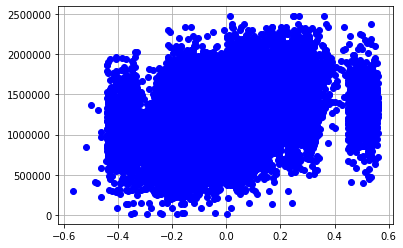

In [6]:
plt.figure(1)
plt.subplot(111)
plt.plot(X, y, 'bo')
plt.grid()
plt.show()

In [7]:
X = pd.DataFrame(X)
X.insert(0, 'x0', 1, True)
X.head()

,x0,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1,0.121932,-0.042817,0.002844,0.024149,-0.188292
1,1,0.118631,0.003735,-0.034156,-0.198073,0.057734
2,1,-0.081153,-0.016194,0.202692,0.255260,0.010348
3,1,-0.058260,0.176153,-0.186228,-0.160296,-0.026685
4,1,-0.095667,-0.136247,0.113193,0.055260,-0.141246


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [10]:
def calculate_weight(x, xi, tau):
    diff = np.sum((x - xi)**2, axis = 1)
    w = np.exp(-diff / (2 * tau * tau))
    w = np.diag(w)
    return w 

In [11]:
def calculate_parameter(x_train, y_train, xi, tau):
    w = calculate_weight(x_train, xi, tau)
    xw = np.dot(x_train.T, w)
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(xw ,x_train)), xw), y_train)
    return np.dot(xi,theta)

In [12]:
def locally_weighted_regression(x_train, x_test, y_train, tau):
    m, n = x_test.shape
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = calculate_parameter(x_train, y_train, x_test.iloc[i], tau)
    
    return y_pred

In [13]:
y_pred = locally_weighted_regression(x_train, x_test, y_train, 0.05)

In [14]:
#Root mean square error
m = y_pred.shape[0]
mse = np.sum((y_pred - y_test)**2)
rmse = np.sqrt(mse / m) 
print("Root Mean Square Error : ", rmse)

Root Mean Square Error :  125205.02459768314


In [15]:
#r2 
ssr = np.sum((y_pred - y_test)**2)
sst = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ssr/sst)
r2_score

0.8655499502685327